In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
credits=pd.read_csv("tmdb_5000_credits.csv")

In [34]:
movies=pd.read_csv("tmdb_5000_movies.csv")

In [35]:
credit=credits.rename(index=str,columns={"movie_id":"id"})

In [36]:
fin=movies.merge(credit,on="id")

# Formula for weighted average recommendation system

   ### W=(RV+CM)/(V+M)

In [37]:
v=fin['vote_count']

In [38]:
R=fin['vote_average']

In [39]:
C=fin['vote_average'].mean()

In [40]:
m=fin['vote_count'].quantile(0.7)

In [41]:
fin['weighted_average']=((R*v)+(C*m))/(v+m)

In [42]:
fins=fin.sort_values("weighted_average",ascending=False)

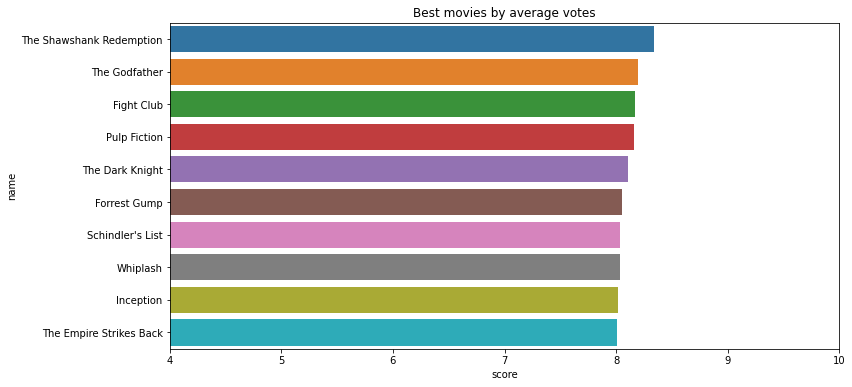

In [46]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=fins['weighted_average'].head(10),y=fins['original_title'].head(10))
plt.xlim(4,10)
plt.title('Best movies by average votes')
plt.xlabel('score')
plt.ylabel('name')
plt.show()

##  Plotting movies on the basis of popularity

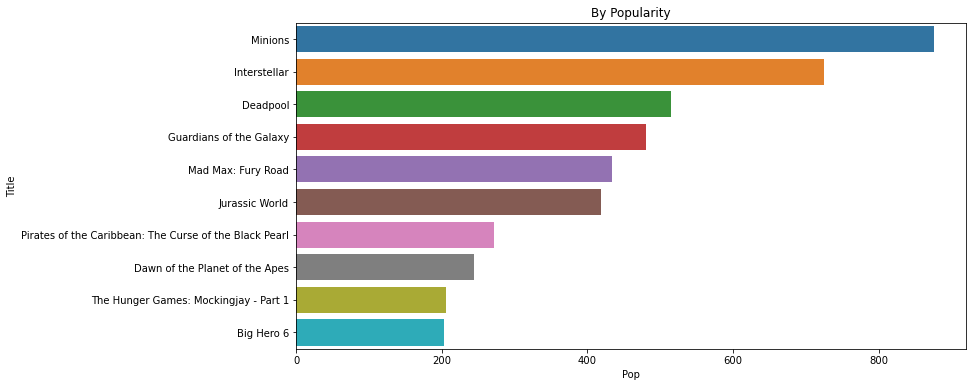

In [47]:
pop=fin.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=pop['popularity'],y=pop['original_title'].head(10),data=pop)
plt.title('By Popularity');plt.xlabel('Pop');plt.ylabel('Title')
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler as mms

In [49]:
scl=mms()

In [50]:
msv=scl.fit_transform(fin[['weighted_average','popularity']])

In [52]:
norma=pd.DataFrame(msv,columns=['weighted_average','popularity'])

In [55]:
fin[['norm_pop','norm_wa']]=norma

In [57]:
fin[['score']]=0.5*norma['weighted_average']+0.5*norma['popularity']

In [59]:
fins=fin.sort_values('score',ascending=False)


Text(0, 0.5, 'Movie Title')

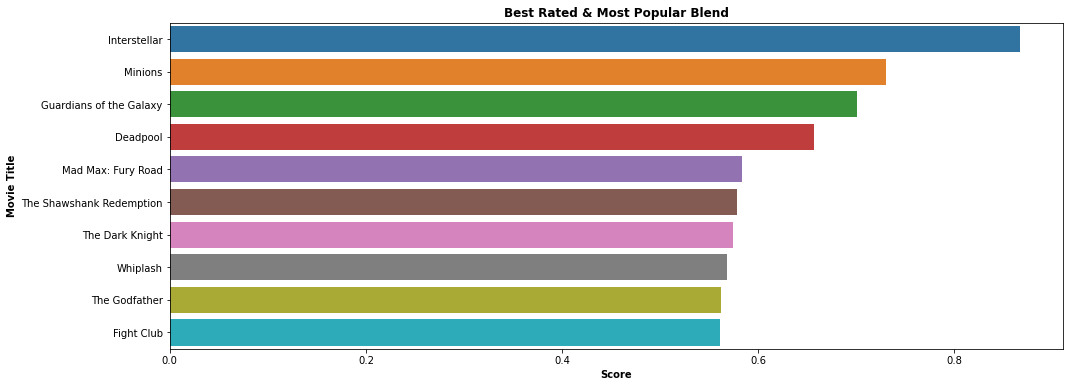

In [64]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x=fins['score'],y=fins['original_title'].head(10),data=fins)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')